In [1]:
import ROOT
import ostap.fixes.fixes
from ostap.core.core import cpp, Ostap
from ostap.core.core import pwd, cwd, ROOTCWD
from ostap.core.core import rootID, funcID, funID, fID, histoID, hID, dsID
from ostap.core.core import VE
from ostap.histos.histos import h1_axis, h2_axes, h3_axes
from ostap.histos.graphs import makeGraph, hToGraph, hToGraph2, hToGraph3, lw_graph
import ostap.trees.trees
import ostap.trees.cuts
import ostap.histos.param
import ostap.histos.compare
import ostap.io.root_file
import ostap.math.models
import ostap.fitting.roofit 
import ostap.fitting.models as Models
canv = ROOT.TCanvas("canv","canv",800,400)

Welcome to JupyROOT 6.20/06


In [27]:
xx = ROOT.RooRealVar("xx","xx",0,1)
yy = ROOT.RooRealVar("yy","yy",0,1)
dat = Models.PolyPos2D_pdf("dat",xvar=xx,yvar=yy,nx=1,ny=1)
dat.phis[0].setVal(1)
dat.phis[1].setVal(0.5)
dat.phis[2].setVal(2)
ds_dat = dat.generate(10000)
mc = Models.PolyPos2D_pdf("mc",xvar=xx,yvar=yy,nx=1,ny=1)
mc.phis[0].setVal(1)
mc.phis[1].setVal(0)
mc.phis[2].setVal(0)
ds_mc = mc.generate(50000)

# PolyPos2D_pdf                    WARNING The name "dat" for PDF already defined!
# PolyPos2D_pdf(dat)               WARNING The variable name "phi0_dat" is already defined!
# PolyPos2D_pdf(dat)               WARNING The variable name "phi1_dat" is already defined!
# PolyPos2D_pdf(dat)               WARNING The variable name "phi2_dat" is already defined!
# PolyPos2D_pdf                    WARNING The name "mc" for PDF already defined!
# PolyPos2D_pdf(mc)                WARNING The variable name "phi0_mc" is already defined!
# PolyPos2D_pdf(mc)                WARNING The variable name "phi1_mc" is already defined!
# PolyPos2D_pdf(mc)                WARNING The variable name "phi2_mc" is already defined!


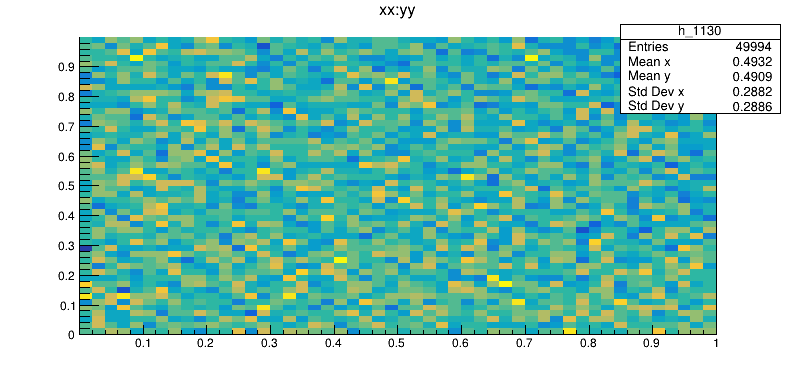

In [28]:
ds_mc.draw("xx:yy","xx>0","col")
canv.Draw()

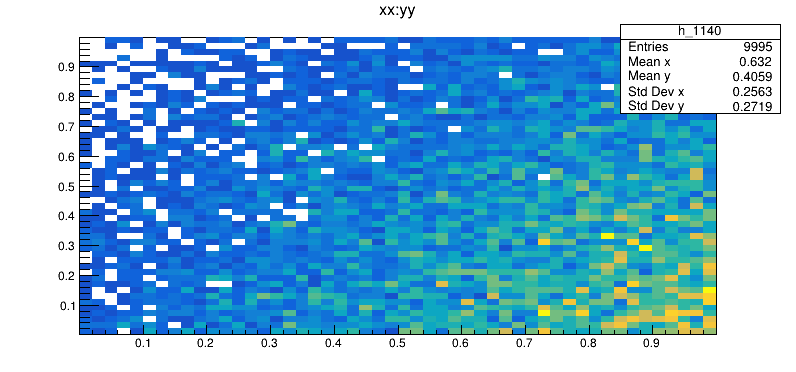

In [29]:
ds_dat.draw("xx:yy","xx>0","col")
canv.Draw()

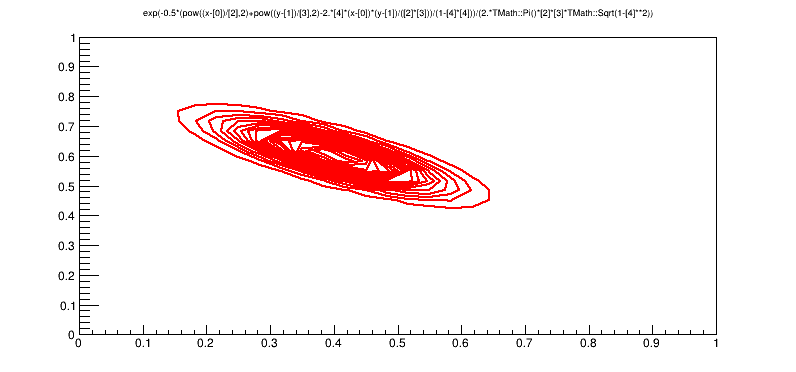

In [30]:
sig_tf2 = ROOT.TF2("sig_tf2","exp(-0.5*(pow((x-[0])/[2],2)+pow((y-[1])/[3],2)-2.*[4]*(x-[0])*(y-[1])/([2]*[3]))/(1-[4]*[4]))/(2.*TMath::Pi()*[2]*[3]*TMath::Sqrt(1-[4]**2))",0,1,0,1)
sig_tf2.SetParameter(0,0.4)
sig_tf2.SetParameter(1,0.6)
sig_tf2.SetParameter(2,0.1)
sig_tf2.SetParameter(3,0.07)
sig_tf2.SetParameter(4,-0.8)
sig_tf2.Draw()
canv.Draw()

In [31]:
var_set = ROOT.RooArgSet( xx, yy )
ds_dat2 = ROOT.RooDataSet( "ds_dat2", "ds_dat2", var_set )
import ctypes
for i in range(2000):
    xref = ctypes.c_double()
    yref = ctypes.c_double()
    sig_tf2.GetRandom2(xref,yref)
    xx.setVal(xref.value)
    yy.setVal(yref.value)
    ds_dat2.add(var_set)

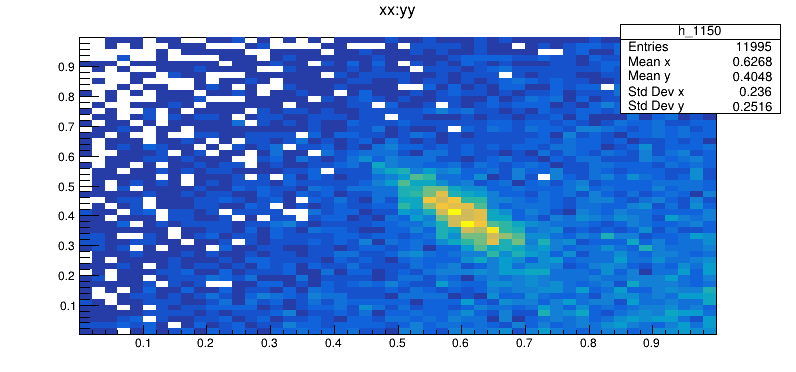

In [32]:
ds_dat += ds_dat2
ds_dat.draw("xx:yy","xx>0","col")
canv.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: hdata (Potential memory leak).


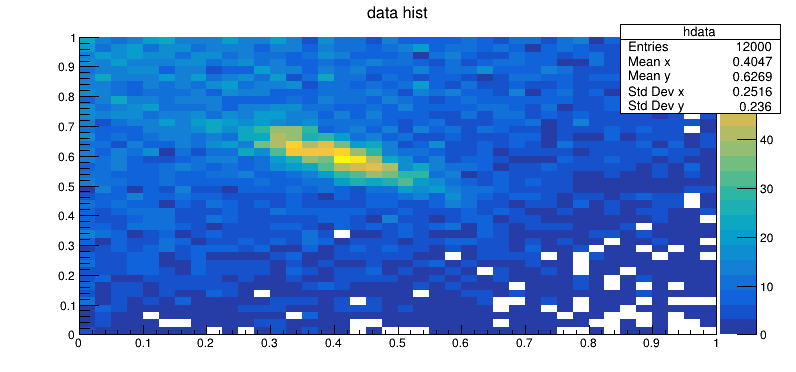

In [35]:
hdata = ROOT.TH2F("hdata","data hist",40,0,1,40,0,1)
for ev in ds_dat:
    hdata.Fill(ev.xx,ev.yy)
hdata.Draw("colz")
canv.Draw()

Bin (4,2) set to 1
Bin (5,1) set to 1
Bin (6,1) set to 1
Bin (8,0) set to 1
Bin (10,0) set to 1
Bin (11,5) set to 1
Bin (13,2) set to 1
Bin (16,13) set to 1
Bin (17,0) set to 1
Bin (17,1) set to 1
Bin (17,4) set to 1
Bin (18,1) set to 1
Bin (19,0) set to 1
Bin (20,0) set to 1
Bin (21,0) set to 1
Bin (21,5) set to 1
Bin (23,10) set to 1
Bin (25,8) set to 1
Bin (26,1) set to 1
Bin (26,3) set to 1
Bin (26,4) set to 1
Bin (27,4) set to 1
Bin (27,6) set to 1
Bin (29,3) set to 1
Bin (29,10) set to 1
Bin (30,0) set to 1
Bin (30,2) set to 1
Bin (31,0) set to 1
Bin (31,3) set to 1
Bin (31,4) set to 1
Bin (31,8) set to 1
Bin (31,9) set to 1
Bin (31,10) set to 1
Bin (32,1) set to 1
Bin (32,11) set to 1
Bin (33,0) set to 1
Bin (33,1) set to 1
Bin (33,2) set to 1
Bin (33,6) set to 1
Bin (33,7) set to 1
Bin (33,12) set to 1
Bin (34,2) set to 1
Bin (34,3) set to 1
Bin (34,8) set to 1
Bin (35,1) set to 1
Bin (35,2) set to 1
Bin (35,4) set to 1
Bin (35,6) set to 1
Bin (35,11) set to 1
Bin (35,14) set t

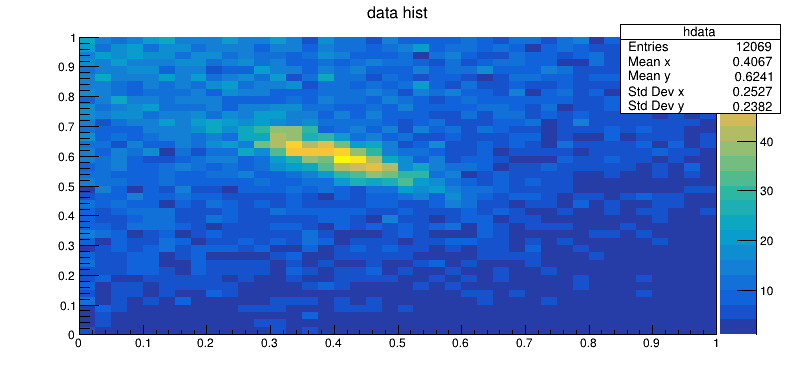

In [36]:
for ix in range(40):
    for iy in range(40):
        if hdata[(ix+1,iy+1)].value() < 1:
            #print("Bin (" + str(ix) + ","+str(iy)+") set to 1")
            hdata[(ix+1,iy+1)] = VE(1,1)
hdata.Draw("colz")
canv.Draw()

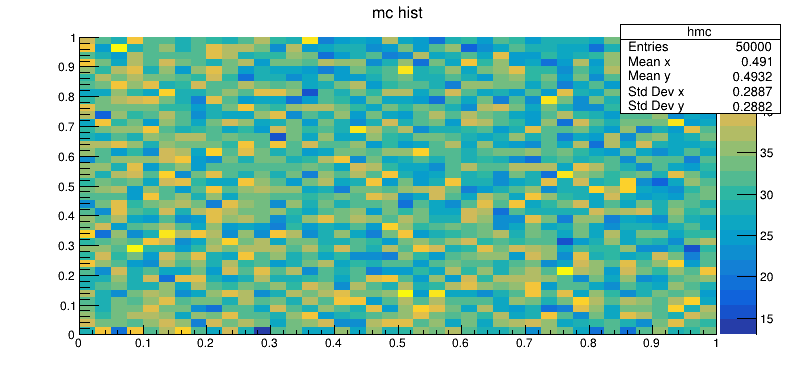

In [37]:
hmc = ROOT.TH2F("hmc","mc hist",40,0,1,40,0,1)
for ev in ds_mc:
    hmc.Fill(ev.xx,ev.yy)
for ix in range(40):
    for iy in range(40):
        if hmc[(ix+1,iy+1)].value() < 1:
            print("Bin (" + str(ix) + ","+str(iy)+") set to 1")
            hmc[(ix+1,iy+1)] = VE(1,1)
hmc.Draw("colz")
canv.Draw()

In [38]:
import ostap.io.zipshelve as DBASE
dbname = 'weights.db'
with DBASE.open( dbname ,'c') as db : 
     pass

In [39]:
from   ostap.tools.reweight           import Weight, makeWeights,  WeightingPlot, W2Data

# ostap.tools.reweight             INFO    Set of utitilities for re-weigthing
# ostap.core.pyrouts               INFO    Zillions of decorations for ROOT/RooFit objects


In [40]:
weightings = (
    Weight.Var ( ('xx','yy') , '2D-reweight' ) , 
    )

for iii in range ( 1 , 6 ) :
    print("Iteration " + str(iii))
    # 0) The weighter object
    weighter = Weight ( dbname , weightings )
    # 1a) create new "weighted" mcdataset
    mcds=ds_mc.Clone()
    ## 1b) add  "weight" variable to dataset 
    mcds.add_reweighting ( weighter ,  name = 'weight' )
    ## 2) update weights
    plots = [ WeightingPlot ( 'yy:xx' , 'weight' , '2D-reweight' , hdata  , hmc  ) ]
    if 2 < iii: 
        plots  = [
            WeightingPlot ( 'yy:xx'   , 'weight' , '2D-reweight' , hdata  , hmc  , 0.99 ) , 
            ]
        more = makeWeights (
            mcds                                   , ## what to be reweighted
            plots                                  , ## reweighting plots/setup
            dbname                                 , ## DBASE with reweigting constant 
            delta  = 0.04                          , ## stopping criteria
            minmax = 0.08                          , ## stopping criteria  
            power = 2 if 1 != len ( plots ) else 1 , ## tune: effective power
            tag = "Reweight/%d" % iii              ) ## tag for printout

# ostap.tools.reweight             WARNING No reweighting is available for ``2D-reweight'', skip it


Iteration 1


/home/ostap/miniconda3/envs/ostap-env/lib/python3.8/site-packages/ostap/trees/funcs.py:68: FutureWarning: The conversion from None to null pointer is deprecated and will not be allowed anymore in a future version of ROOT. Instead, use ROOT.nullptr or 0
  Ostap.Functions.PyFuncData.__init__ ( self , self , data  )
# ostap.tools.reweight             WARNING No reweighting is available for ``2D-reweight'', skip it


Iteration 2


# ostap.tools.reweight             WARNING No reweighting is available for ``2D-reweight'', skip it


Iteration 3


# ostap.tools.reweight             INFO    Reweight/3:              2D-reweight: mean=(1.00+-0.02) min/max=0.089/10.281 rms=(96.31+-2.32)[%]
# ostap.tools.reweight             INFO    Reweight/3: reweights are: *2D-reweight*


Iteration 4


# ostap.tools.reweight             INFO    Reweight/4:              2D-reweight: mean=(1.00+-0.01) min/max=0.235/1.641 rms=(22.36+-0.13)[%]
# ostap.tools.reweight             INFO    Reweight/4: reweights are: *2D-reweight*


Iteration 5


# ostap.tools.reweight             INFO    Reweight/5:              2D-reweight: mean=(1.00+-0.00) min/max=0.232/1.237 rms=(16.73+-0.07)[%]
# ostap.tools.reweight             INFO    Reweight/5: reweights are: *2D-reweight*


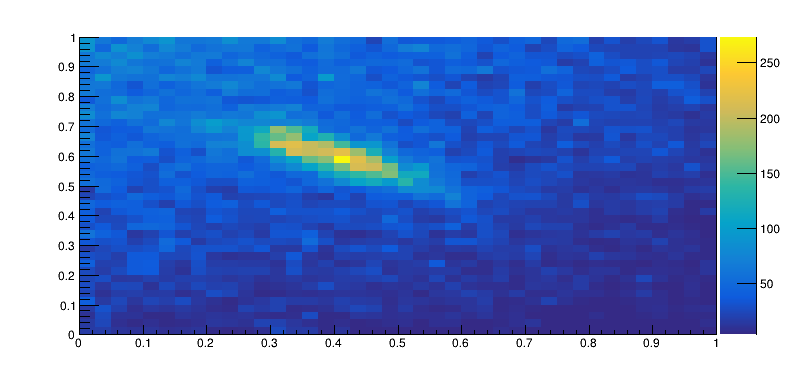

In [41]:
hmc.Draw("colz")
canv.Draw()

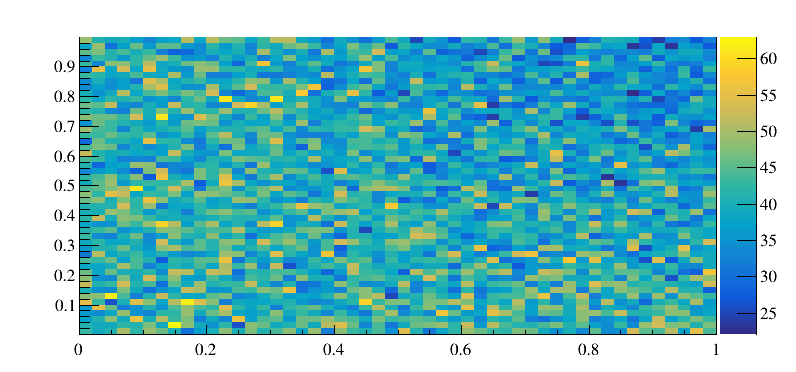

In [43]:
ds_test = mc.generate(100000)
ds_test.draw("yy:xx","xx>0","colz")
canv.Draw()

In [44]:
weightings = [
    ##         accessor function    address indatabase    
    Weight.Var ( lambda s : (s.xx,s.yy) , '2D-reweight' ) ,    
]
weighter = Weight ( dbname , weightings )

Warning in <TROOT::Append>: Replacing existing TH1: htest (Potential memory leak).


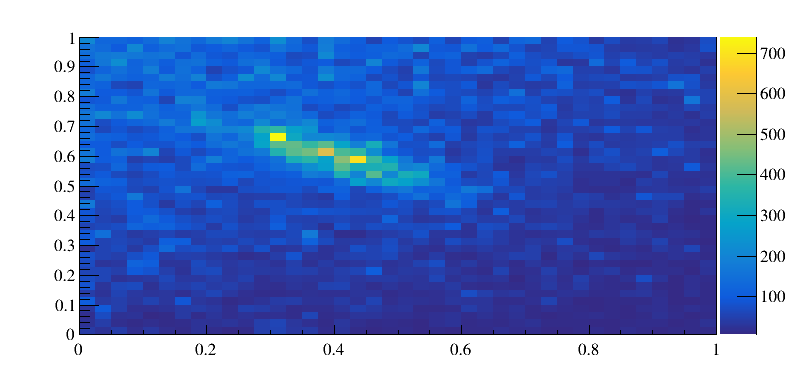

In [46]:
htest = ROOT.TH2F("htest","test hist",40,0,1,40,0,1)
for ev in  ds_test :
    htest.Fill(ev.xx,ev.yy, weighter ( ev ))
htest.Draw("colz")
canv.Draw()